### **DATA PROCESSING**

**Importing Dependicies**

In [1]:
import pandas as pd #for manipulating data
import numpy as np  #mathematical computation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #statistical graphics
from sklearn.model_selection import train_test_split  #splitting data arrays into two subsets: for training data and for testing data.
from sklearn.linear_model import LinearRegression #importing algorithm
from sklearn import metrics #for accuracy calculation

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

**Analyzing our dataset**

In [3]:
# inspecting the first 10 rows of the dataframe
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.columns #Shows the category of columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_dataset.duplicated().sum()

2

**Quality Check and data cleaning**

* Remove irrelevant columns such Car_name
* Remove null values
* Remove duplicate value
* Encoding Year into Age from formula (Current year-Selling Year)
* Encoding object datatype category (Kms_Driven, Fuel_Type, Seller_Type, Transmission) into integer data


In [9]:
car_dataset=car_dataset.drop(['Car_Name'],axis=1) #Remove Car_name column

In [10]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
car_dataset.shape

(301, 8)

In [12]:
car_dataset=car_dataset.drop_duplicates() #Remove duplicate value

In [13]:
car_dataset.duplicated().sum()

0

In [14]:
car_dataset['Year'].unique() #Checking unique value in year

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [15]:
current_year = 2021 #Declaring current year

In [16]:
car_dataset['Year'] = 2021 - car_dataset['Year']  #Encoding year into car age

In [17]:
car_dataset = car_dataset.rename(columns={"Year": "Car_Age"}) #Renaming columns

In [18]:
car_dataset.head()

,Car_Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [20]:
#Encoding object data type

# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [21]:
car_dataset.head(5)

,Car_Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,0,0,0,0
1,8,4.75,9.54,43000,1,0,0,0
2,4,7.25,9.85,6900,0,0,0,0
3,10,2.85,4.15,5200,0,0,0,0
4,7,4.60,6.87,42450,1,0,0,0


**Plotting and detecting outliers**

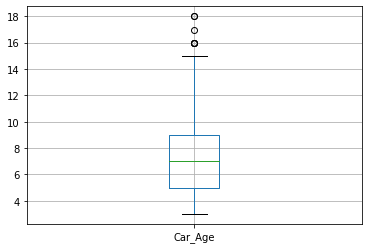

In [22]:
car_dataset.boxplot(column=["Car_Age"])
plt.show()


In [23]:
#Defining Outlier Function
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [24]:
lowage,upage=remove_outlier(car_dataset['Car_Age'])
car_dataset['Car_Age']=np.where(car_dataset['Car_Age']>upage,upage,car_dataset['Car_Age'])
car_dataset['Car_Age']=np.where(car_dataset['Car_Age']<lowage,lowage,car_dataset['Car_Age'])

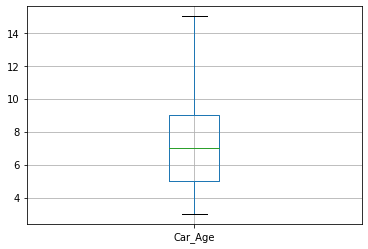

In [25]:
car_dataset.boxplot(column=["Car_Age"])
plt.show()

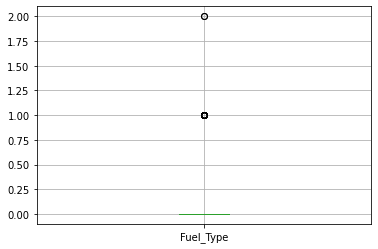

In [26]:
car_dataset.boxplot(column=["Fuel_Type"])
plt.show()

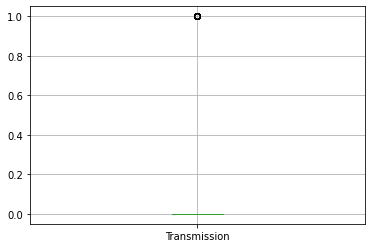

In [27]:
car_dataset.boxplot(column=["Transmission"])
plt.show()

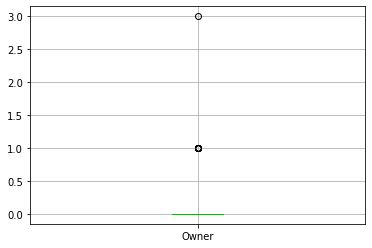

In [28]:
car_dataset.boxplot(column=["Owner"])
plt.show()

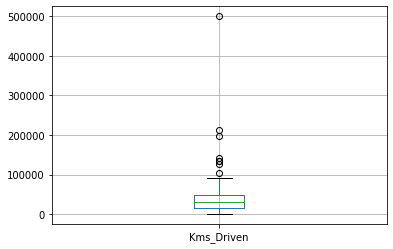

In [29]:
car_dataset.boxplot(column=["Kms_Driven"])
plt.show()

In [30]:
lowage,upage=remove_outlier(car_dataset['Kms_Driven'])
car_dataset['Kms_Driven']=np.where(car_dataset['Kms_Driven']>upage,upage,car_dataset['Kms_Driven'])
car_dataset['Kms_Driven']=np.where(car_dataset['Kms_Driven']<lowage,lowage,car_dataset['Kms_Driven'])

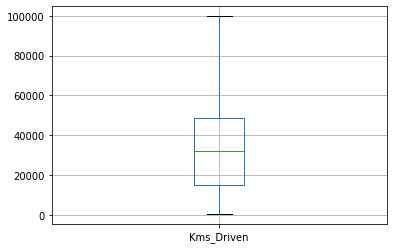

In [31]:
car_dataset.boxplot(column=["Kms_Driven"])
plt.show()

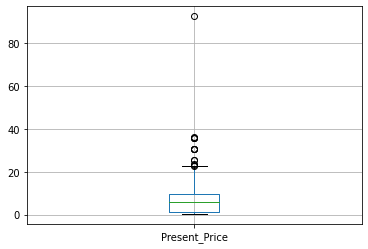

In [32]:
car_dataset.boxplot(column=["Present_Price"])
plt.show()

In [33]:
lowage,upage=remove_outlier(car_dataset['Present_Price'])
car_dataset['Present_Price']=np.where(car_dataset['Present_Price']>upage,upage,car_dataset['Present_Price'])
car_dataset['Present_Price']=np.where(car_dataset['Present_Price']<lowage,lowage,car_dataset['Present_Price'])

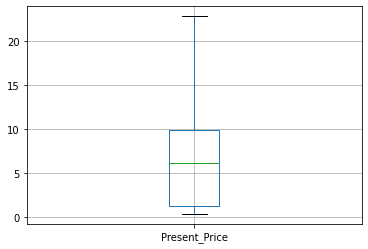

In [34]:
car_dataset.boxplot(column=["Present_Price"])
plt.show()

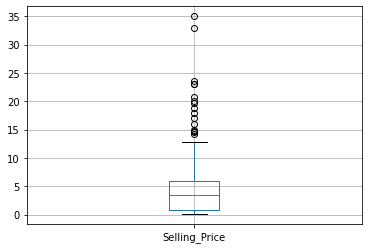

In [35]:
car_dataset.boxplot(column=["Selling_Price"])
plt.show()

In [36]:
lowage,upage=remove_outlier(car_dataset['Selling_Price'])
car_dataset['Selling_Price']=np.where(car_dataset['Selling_Price']>upage,upage,car_dataset['Selling_Price'])
car_dataset['Selling_Price']=np.where(car_dataset['Selling_Price']<lowage,lowage,car_dataset['Selling_Price'])

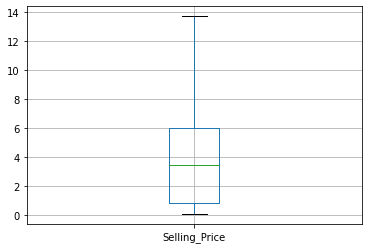

In [37]:
car_dataset.boxplot(column=["Selling_Price"])
plt.show()

In [38]:
car_dataset.corr() #corelation

,Car_Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Age,1.000000,-0.281223,0.039317,0.641909,-0.044009,0.036581,0.002028,0.192289
Selling_Price,-0.281223,1.000000,0.868861,0.126259,0.509973,-0.673980,0.288933,-0.100757
Present_Price,0.039317,0.868861,1.000000,0.388529,0.443060,-0.664198,0.356227,0.023255
Kms_Driven,0.641909,0.126259,0.388529,1.000000,0.280368,-0.268473,0.093170,0.093140
Fuel_Type,-0.044009,0.509973,0.443060,0.280368,1.000000,-0.347922,0.068618,-0.054174
Seller_Type,0.036581,-0.673980,-0.664198,-0.268473,-0.347922,1.000000,-0.058669,0.123646
Transmission,0.002028,0.288933,0.356227,0.093170,0.068618,-0.058669,1.000000,0.052166
Owner,0.192289,-0.100757,0.023255,0.093140,-0.054174,0.123646,0.052166,1.000000


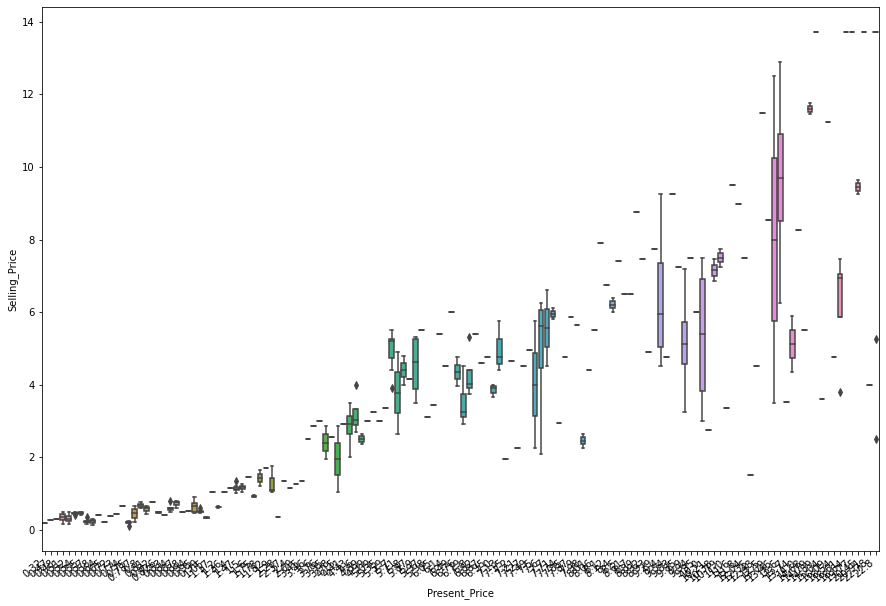

In [39]:
plt.subplots(figsize=(15,10))
ax=sns.boxplot(x='Present_Price',y='Selling_Price',data=car_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

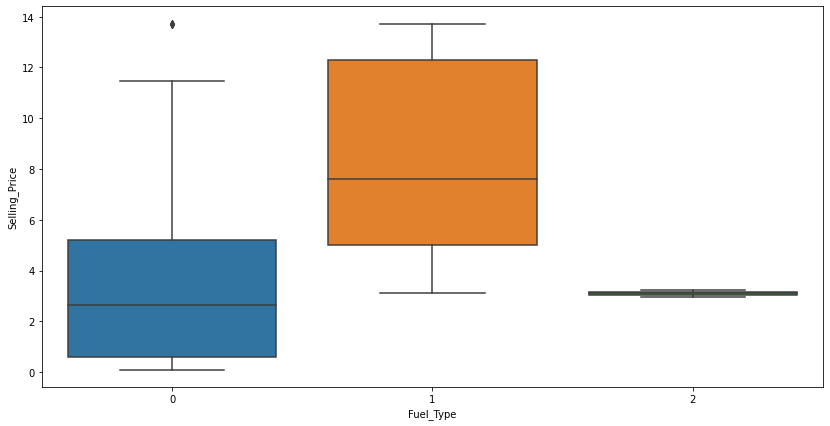

In [40]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=car_dataset)

**Saving Clean data set**

In [41]:
car_dataset.to_csv('Clean_car_dataset.csv')

**Splitting Traing data into Prameters and Target**

In [42]:
X = car_dataset.drop(['Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [43]:
X

,Car_Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7.0,5.59,27000.0,0,0,0,0
1,8.0,9.54,43000.0,1,0,0,0
2,4.0,9.85,6900.0,0,0,0,0
3,10.0,4.15,5200.0,0,0,0,0
4,7.0,6.87,42450.0,1,0,0,0
...,...,...,...,...,...,...,...
296,5.0,11.60,33988.0,1,0,0,0
297,6.0,5.90,60000.0,0,0,0,0
298,12.0,11.00,87934.0,0,0,0,0
299,4.0,12.50,9000.0,1,0,0,0


In [44]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

**Splitting Traing and Testing data**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

# **Model Training**
**Linear Regression**

In [46]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [47]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Evaluation (Training data)**

In [48]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [49]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8678734887119354


Visualize the actual prices and Predicted prices

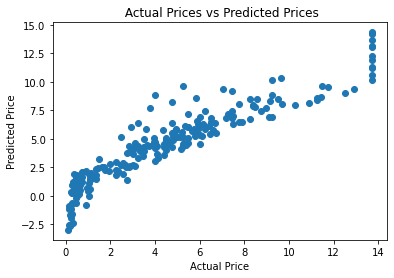

In [50]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**Model Evaluation (Testing data)**

In [51]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [52]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9253966814273094


Visualize the actual prices and Predicted prices

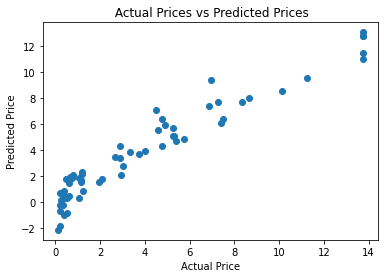

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# **Saving machine learning model**

In [54]:
import pickle 
pickle.dump(lin_reg_model, open('car_price.pkl', 'wb'))

In [55]:
X_test.shape

(60, 7)